In [3]:
from datetime import datetime, timedelta
from zipfile import ZipFile
import pandas as pd
import calendar
import os
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
option_data_folder = 'E:/projects/stock data/augmented2'
all_fnames = list(glob.glob(f'{option_data_folder}/*'))

In [5]:
stock_data = pd.read_csv('E:/projects/stock data/only_stock_prices.csv', index_col=['Symbol', 'DataDate'], parse_dates=['DataDate'])

In [4]:
def conv_days(row):
    diff = (row['ExpirationDate'] - row['DataDate'])
    if diff.days >= 365:
        return 365 * (diff.days // 365)
    elif diff.days >= 31:
        return 31 * (diff.days // 31)
    elif diff.days > 7:
        return 7 * (diff.days // 7)
    else:
        return diff.days

def conv_strike(row):
    diff = row['StrikePrice'] / row['UnderlyingPrice']
    if 0.9 <= diff <= 1.1:
        diff = diff - diff % 0.005
    else:
        diff = diff - diff % 0.05
    return diff - 1

def conv_profit(row):
    p = row['LastPrice'] # premium on option
    if row['PutCall'] == 'call':
        p += min(row['StrikePrice'], row['UnderlyingPriceAtExpiration']) - row['UnderlyingPrice']
    else:
        if row['UnderlyingPriceAtExpiration'] < row['StrikePrice']:
            p -= row['StrikePrice'] - row['UnderlyingPriceAtExpiration']
        else:
            pass
    return p / row['UnderlyingPrice']
        

In [206]:
stocks = {'OSTK', 'PINS', 'TWTR', 'AMD', 'TWLO', 'SPOT', 'FB', 'JNUG', 'NUGT', 'BA', 'BYND',
                              'PFE', 'ATVI', 'AAPL', 'ROKU', 'SFIX', 'SQ', 'TSLA', 'MMM', 'MSFT', 'LULU',
                              'NVDA', 'MA', 'BABA', 'CAT', 'AMAT', 'NFLX', 'PYPL', 'AXP', 'ABT', 'CRM',
                              'BAC', 'CME', 'DIS', 'V', 'NKE', 'CVS', 'PM', 'WMT', 'JNJ', 'HSY'}

In [199]:

piv_arr = []
for fname in all_fnames[::-1]:
    print(fname)
    df = pd.read_csv(fname, parse_dates=['ExpirationDate', 'DataDate'])
    df = df[~df['UnderlyingPriceAtExpiration'].isna()]
    df = df[df['PutCall'] == 'call']
    df = df[df['Symbol'].isin(stocks)]
    if len(df) == 0:
        continue
    
    df['diff_days'] = df.apply(conv_days, axis=1)
    df['diff_strike'] = df.apply(conv_strike, axis=1)
    df['expected_profit'] = df.apply(conv_profit, axis=1)

    df_summery = df[['diff_days', 'diff_strike', 'expected_profit']].groupby(['diff_days', 'diff_strike']).mean()
    df_summery = df_summery.reset_index()
    piv = df_summery.pivot(index='diff_strike', columns='diff_days', values='expected_profit')
    piv_arr.append(piv)

E:/projects/stock data/augmented2\D_20201009_OData2.csv
E:/projects/stock data/augmented2\D_20201009_OData1.csv
E:/projects/stock data/augmented2\D_20201008_OData2.csv
E:/projects/stock data/augmented2\D_20201008_OData1.csv
E:/projects/stock data/augmented2\D_20201007_OData2.csv
E:/projects/stock data/augmented2\D_20201007_OData1.csv
E:/projects/stock data/augmented2\D_20201006_OData2.csv
E:/projects/stock data/augmented2\D_20201006_OData1.csv
E:/projects/stock data/augmented2\D_20201005_OData2.csv
E:/projects/stock data/augmented2\D_20201005_OData1.csv
E:/projects/stock data/augmented2\D_20201002_OData2.csv
E:/projects/stock data/augmented2\D_20201002_OData1.csv
E:/projects/stock data/augmented2\D_20201001_OData2.csv
E:/projects/stock data/augmented2\D_20201001_OData1.csv
E:/projects/stock data/augmented2\D_20200930_OData2.csv
E:/projects/stock data/augmented2\D_20200930_OData1.csv
E:/projects/stock data/augmented2\D_20200929_OData2.csv
E:/projects/stock data/augmented2\D_20200929_ODa

E:/projects/stock data/augmented2\D_20200630_OData1.csv
E:/projects/stock data/augmented2\D_20200629_OData2.csv
E:/projects/stock data/augmented2\D_20200629_OData1.csv
E:/projects/stock data/augmented2\D_20200626_OData2.csv
E:/projects/stock data/augmented2\D_20200626_OData1.csv
E:/projects/stock data/augmented2\D_20200625_OData.csv
E:/projects/stock data/augmented2\D_20200624_OData.csv
E:/projects/stock data/augmented2\D_20200623_OData.csv
E:/projects/stock data/augmented2\D_20200622_OData.csv
E:/projects/stock data/augmented2\D_20200619_OData.csv
E:/projects/stock data/augmented2\D_20200618_OData.csv
E:/projects/stock data/augmented2\D_20200617_OData.csv
E:/projects/stock data/augmented2\D_20200616_OData.csv
E:/projects/stock data/augmented2\D_20200615_OData.csv
E:/projects/stock data/augmented2\D_20200612_OData.csv
E:/projects/stock data/augmented2\D_20200611_OData.csv
E:/projects/stock data/augmented2\D_20200610_OData.csv
E:/projects/stock data/augmented2\D_20200609_OData.csv
E:/pr

E:/projects/stock data/augmented2\D_20191206_OData.csv
E:/projects/stock data/augmented2\D_20191205_OData.csv
E:/projects/stock data/augmented2\D_20191204_OData.csv
E:/projects/stock data/augmented2\D_20191203_OData.csv
E:/projects/stock data/augmented2\D_20191202_OData.csv
E:/projects/stock data/augmented2\D_20191129_OData.csv
E:/projects/stock data/augmented2\D_20191128_OData.csv
E:/projects/stock data/augmented2\D_20191127_OData.csv
E:/projects/stock data/augmented2\D_20191126_OData.csv
E:/projects/stock data/augmented2\D_20191125_OData.csv
E:/projects/stock data/augmented2\D_20191122_OData.csv
E:/projects/stock data/augmented2\D_20191121_OData.csv
E:/projects/stock data/augmented2\D_20191120_OData.csv
E:/projects/stock data/augmented2\D_20191119_OData.csv
E:/projects/stock data/augmented2\D_20191118_OData.csv
E:/projects/stock data/augmented2\D_20191115_OData.csv
E:/projects/stock data/augmented2\D_20191114_OData.csv
E:/projects/stock data/augmented2\D_20191113_OData.csv
E:/project

E:/projects/stock data/augmented2\20190508_OData.csv
E:/projects/stock data/augmented2\20190507_OData.csv
E:/projects/stock data/augmented2\20190506_OData.csv
E:/projects/stock data/augmented2\20190503_OData.csv
E:/projects/stock data/augmented2\20190502_OData.csv
E:/projects/stock data/augmented2\20190501_OData.csv
E:/projects/stock data/augmented2\20190430_OData.csv
E:/projects/stock data/augmented2\20190429_OData.csv
E:/projects/stock data/augmented2\20190426_OData.csv
E:/projects/stock data/augmented2\20190425_OData.csv
E:/projects/stock data/augmented2\20190424_OData.csv
E:/projects/stock data/augmented2\20190423_OData.csv
E:/projects/stock data/augmented2\20190422_OData.csv
E:/projects/stock data/augmented2\20190419_OData.csv
E:/projects/stock data/augmented2\20190418_OData.csv
E:/projects/stock data/augmented2\20190417_OData.csv
E:/projects/stock data/augmented2\20190416_OData.csv
E:/projects/stock data/augmented2\20190415_OData.csv
E:/projects/stock data/augmented2\20190412_ODa

E:/projects/stock data/augmented2\20180925_OData.csv
E:/projects/stock data/augmented2\20180924_OData.csv
E:/projects/stock data/augmented2\20180921_OData.csv
E:/projects/stock data/augmented2\20180920_OData.csv
E:/projects/stock data/augmented2\20180919_OData.csv
E:/projects/stock data/augmented2\20180918_OData.csv
E:/projects/stock data/augmented2\20180917_OData.csv
E:/projects/stock data/augmented2\20180914_OData.csv
E:/projects/stock data/augmented2\20180913_OData.csv
E:/projects/stock data/augmented2\20180912_OData.csv
E:/projects/stock data/augmented2\20180911_OData.csv
E:/projects/stock data/augmented2\20180910_OData.csv
E:/projects/stock data/augmented2\20180907_OData.csv
E:/projects/stock data/augmented2\20180906_OData.csv
E:/projects/stock data/augmented2\20180905_OData.csv
E:/projects/stock data/augmented2\20180904_OData.csv
E:/projects/stock data/augmented2\20180831_OData.csv
E:/projects/stock data/augmented2\20180830_OData.csv
E:/projects/stock data/augmented2\20180829_ODa

KeyboardInterrupt: 

In [200]:
ddd = pd.concat(piv_arr)
findal_df = ddd.groupby('diff_strike').sum() / ddd.groupby('diff_strike').count()
for c in list(findal_df.columns):
    if c == 0:
        findal_df = findal_df.drop(columns={0})
        continue
    # estimate yearly cycles
    if c == 1:
        cycles = findal_df[c] * 52 * 5 # five times a week
    elif c == 2:
        cycles = findal_df[c] * 52 * 3 # 3 times a week
    elif c == 3:
        cycles = findal_df[c] * 52 * 2 # 2 times a week
    else:
        cycles = findal_df[c] * 52 * 5 / c
    findal_df[c] = findal_df[c] ** cycles
        
        
findal_df = findal_df[(findal_df.index > 0) & (findal_df.index < 0.3)]

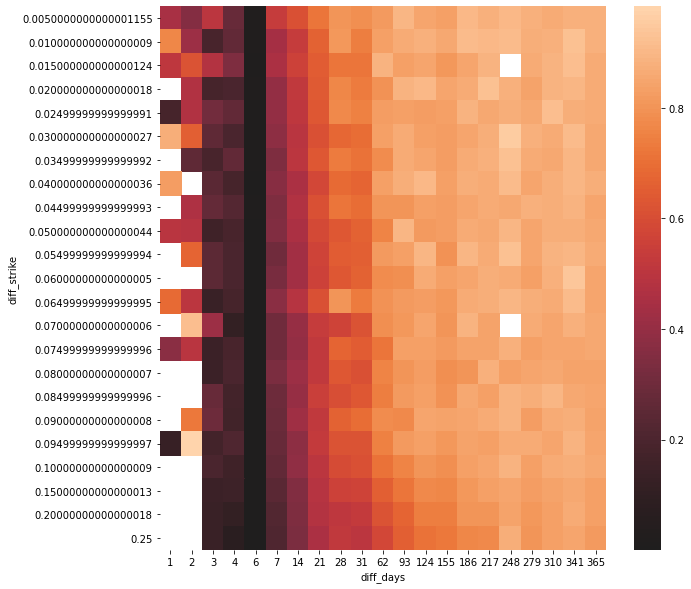

In [204]:
plt.rcParams['figure.figsize'] = (10, 10)
sns.heatmap(findal_df, center=0)

In [205]:
df = pd.read_csv('E:/projects/stock data/augmented2/20180827_OData.csv', parse_dates=['ExpirationDate', 'DataDate'])


In [229]:
ddf = df
ddf = ddf[~ddf['UnderlyingPriceAtExpiration'].isna()]
ddf = ddf[ddf['PutCall'] == 'call']
ddf = ddf[ddf['Symbol'].isin(stocks)]

ddf['diff_days'] = ddf.apply(conv_days, axis=1)
ddf['diff_strike'] = ddf.apply(conv_strike, axis=1)
ddf['expected_profit'] = ddf.apply(conv_profit, axis=1)
ddf = ddf[(ddf['diff_strike'] > 0) & (ddf['diff_strike'] < 0.0051)]
ddf = ddf[(ddf['diff_days'] >= 365) & (ddf['diff_strike'] <= 365)]

In [230]:
ddf

,Unnamed: 0,optionkey,Symbol,ExpirationDate,AskPrice,AskSize,BidPrice,BidSize,LastPrice,PutCall,StrikePrice,Volume,openinterest,UnderlyingPrice,DataDate,UnderlyingPriceAtExpiration,diff_days,diff_strike,expected_profit
3274,18897,WMT2020-01-17c95.002018-08-27,WMT,2020-01-17,9.15,18,8.90,1,8.85,call,95.0,50,2427,94.52,2018-08-27,114.96,365,0.005,0.098709
15486,97862,AAPL2020-01-17c220.002018-08-27,AAPL,2020-01-17,25.18,6,25.03,11,25.00,call,220.0,89,7661,217.97,2018-08-27,318.73,365,0.005,0.124008
15542,97944,AAPL2020-06-19c220.002018-08-27,AAPL,2020-06-19,29.63,1,29.15,1,29.20,call,220.0,666,3008,217.97,2018-08-27,349.72,365,0.005,0.143277
16254,102456,ABT2020-01-17c67.502018-08-27,ABT,2020-01-17,6.50,31,6.35,70,6.29,call,67.5,2,638,66.84,2018-08-27,89.00,365,0.005,0.103980
81133,562912,MMM2020-01-17c210.002018-08-27,MMM,2020-01-17,20.45,27,19.90,6,19.90,call,210.0,45,797,208.32,2018-08-27,181.35,365,0.005,-0.033938
88705,606908,NUGT2020-01-17c15.002018-08-27,NUGT,2020-01-17,4.55,15,4.25,11,4.40,call,15.0,213,1310,14.92,2018-08-27,31.43,365,0.005,0.300268


# Scrape splits from the internet

In [24]:
import requests
from bs4 import BeautifulSoup
from dateparser.search import search_dates
import re

In [94]:
def extract_splits(txt, ticker):
    splits = []
    txt = re.sub('[\n\r\t]', '', txt)
    sentences = txt.split('.')
    for i, s in enumerate(sentences):
        if i == len(sentences) - 1:
            continue
        if 'took place' in s:
            candidates = search_dates(s[s.find('took place'):])
            if candidates is None:
                continue
            dt = candidates[0][1]
            
            s2 = sentences[i+1]
            match = re.findall('(\d+) for (\d+)', s2)
            if match is None or len(match) == 0:
                continue
            split_pre, split_post = match[0]
            split_pre, split_post = int(split_pre), int(split_post)
            if 'reverse split' in s2 and split_pre < split_post:
                split_pre, split_post = split_post, split_pre
            elif 'reverse split' not in s2 and split_pre > split_post:
                split_pre, split_post = split_post, split_pre
                
            splits.append({
                'Symbol': ticker,
                'DataDate': dt,
                'SplitType': 'reverse' if 'reverse split' in s2 else 'forward',
                'SplitBefore': split_pre,
                'SplitAfter': split_post
            })
    return splits

In [ ]:
all_splits = []
for ticker in stock_data.index.get_level_values('Symbol').unique():
    print(ticker)
    stock_df = stock_data[stock_data.index.get_level_values('Symbol') == ticker]

    stock_df = stock_df.sort_values(['DataDate'])
    ratio_df = stock_df['Price'] / stock_df['Price'].shift(1)
    
    tries = 0
    got_it = False
    while tries < 3:
        try:
            response = requests.get(f'https://www.stocksplithistory.com/?symbol={ticker}')
            got_it = True
        except:
            print('connection failed...')
        tries += 1
    if not got_it:
        continue
        
    soup = BeautifulSoup(response.text, 'html.parser')
    txt = soup.html.body.center.find_all('div')[2].find_all('table')[3].tr.find_all('td')[7].text
    if txt is None:
        continue

    splits = extract_splits(txt, ticker)
    # safety: make sure split makes sense in data
    for split in splits:
        if split['DataDate'].year < 2005:
            continue
        if (split['Symbol'], split['DataDate']) not in ratio_df:
            print(f"!!! No date in data for {split['Symbol']}, at {split['DataDate']}")
            continue
            
        move = ratio_df.loc[(split['Symbol'], split['DataDate'])]
        expected_move = split['SplitBefore'] / split['SplitAfter']
        if not (expected_move * 0.8 < move < expected_move * 1.2):
            print(move, expected_move)
            print(f"!!! Got {split['SplitBefore']}:{split['SplitAfter']} {split['SplitType']} split for {split['Symbol']}, at {split['DataDate']} but the stock only moved to {100 * move}%")
            continue
            
        print(f"Got a {split['SplitBefore']}:{split['SplitAfter']} {split['SplitType']} split for {split['Symbol']} on {split['DataDate']}")
        all_splits.append(split)


A
Got a 1000:1398 forward split for A on 2014-11-03 00:00:00
AA
Got a 3:1 reverse split for AA on 2016-10-06 00:00:00
AAI
AAP
Got a 2:3 forward split for AAP on 2005-09-26 00:00:00
MRN
MRO
Got a 1:2 forward split for MRO on 2007-06-19 00:00:00
Got a 5965:10000 forward split for MRO on 2011-07-01 00:00:00
MRX
MSA
MSH
MSO
MT
Got a 3:1 reverse split for MT on 2017-05-22 00:00:00
MTB
MTD
MTF
MTG
MTH
Got a 1:2 forward split for MTH on 2005-01-10 00:00:00
MTX
Got a 1:2 forward split for MTX on 2012-12-12 00:00:00
MTZ
MU
MUR
Got a 1:2 forward split for MUR on 2005-06-06 00:00:00
Got a 1000:1158 forward split for MUR on 2013-09-03 00:00:00
MUT
MVB
MVK
MVL
MVR
MW
Got a 2:3 forward split for MW on 2005-06-14 00:00:00
MWD
MWV
MWY
MXO
MXT
MYG
MYK
MYL
N
NAT
Got a 1000:1014 forward split for NAT on 2014-07-23 00:00:00
Got a 1000:1008 forward split for NAT on 2017-08-10 00:00:00
NAV
NBI
NBL
Got a 1:2 forward split for NBL on 2005-09-15 00:00:00
Got a 1:2 forward split for NBL on 2013-05-29 00:00:00
N

SO
SOV
Got a 100:105 forward split for SOV on 2006-06-13 00:00:00
SPF
Got a 1:2 forward split for SPF on 2005-08-30 00:00:00
SPG
Got a 1000:1063 forward split for SPG on 2014-05-29 00:00:00
Got a 100000:100722 forward split for SPG on 2009-08-13 00:00:00
Got a 10000:10063 forward split for SPG on 2009-11-12 00:00:00
SPN
SPW
SPX
SPY
SRA
SRE
SRP
SRR
SRT
SRX
Got a 1:2 forward split for SRX on 2005-05-31 00:00:00
SRZ
Got a 1:2 forward split for SRZ on 2005-10-04 00:00:00
SSI
Got a 2:3 forward split for SSI on 2007-02-01 00:00:00
SSP
Got a 3:1 reverse split for SSP on 2008-07-16 00:00:00
Got a 1000:1127 forward split for SSP on 2015-04-01 00:00:00
STA
STE
STI
STJ
STK
STM
STN
!!! No date in data for STN, at 2014-11-17 00:00:00
STO
STR
Got a 1:2 forward split for STR on 2007-06-19 00:00:00
Got a 322:1000 forward split for STR on 2010-07-01 00:00:00
STT
STX
STZ
Got a 1:2 forward split for STZ on 2005-05-16 00:00:00
SU
Got a 1:2 forward split for SU on 2008-05-27 00:00:00
SUG
SUN
Got a 1:2 forw

WDR
WEC
Got a 1:2 forward split for WEC on 2011-03-02 00:00:00
WEN
WFC
Got a 1:2 forward split for WFC on 2006-08-14 00:00:00
WFR
WFT
Got a 1:2 forward split for WFT on 2005-12-01 00:00:00
Got a 1:2 forward split for WFT on 2008-05-27 00:00:00
WGO
WGR
WHQ
WHR
WIT
Got a 1:2 forward split for WIT on 2005-09-02 00:00:00
Got a 3:5 forward split for WIT on 2010-06-23 00:00:00
Got a 1000:1121 forward split for WIT on 2013-04-09 00:00:00
Got a 1:2 forward split for WIT on 2017-06-22 00:00:00
WL
WLP
Got a 1:2 forward split for WLP on 2005-06-01 00:00:00
WLT
WM
WMB
Got a 8152:10000 forward split for WMB on 2012-01-03 00:00:00
WMH
WMI
WMS
Got a 2:3 forward split for WMS on 2007-06-15 00:00:00
WMT
WNC
WON
WOR
WPI
WPS
WSH
WSM
WSO
WTR
Got a 3:4 forward split for WTR on 2005-12-02 00:00:00
Got a 4:5 forward split for WTR on 2013-09-03 00:00:00
WTW
WTZ
WW
WWW
connection failed...
connection failed...
connection failed...
WWY
connection failed...
connection failed...
connection failed...
WY
connection

CHP
CHS
Got a 1:2 forward split for CHS on 2005-02-23 00:00:00
CHT
0.6559739655973965 0.8264462809917356
!!! Got 100:121 forward split for CHT, at 2008-10-15 00:00:00 but the stock only moved to 65.59739655973965%
!!! No date in data for CHT, at 2010-01-21 00:00:00
!!! No date in data for CHT, at 2011-01-07 00:00:00
CHU
CI
Got a 1:3 forward split for CI on 2007-06-05 00:00:00
CIN
CIT
CK
CKC
CKP
CKR
CL
Got a 1:2 forward split for CL on 2013-05-16 00:00:00
CLE
CLF
nan 0.5
!!! Got 1:2 forward split for CLF, at 2005-01-03 00:00:00 but the stock only moved to nan%
Got a 1:2 forward split for CLF on 2006-07-03 00:00:00
Got a 1:2 forward split for CLF on 2008-05-16 00:00:00
CLI
CLS
CLX
CMA
CMC
Got a 1:2 forward split for CMC on 2005-01-11 00:00:00
Got a 1:2 forward split for CMC on 2006-05-23 00:00:00
CME
Got a 1:5 forward split for CME on 2012-07-23 00:00:00
CMI
Got a 1:2 forward split for CMI on 2007-04-10 00:00:00
Got a 1:2 forward split for CMI on 2008-01-03 00:00:00
CMN
Got a 2:3 forward

Got a 100:207 forward split for FNF on 2006-10-25 00:00:00
Got a 1000:1216 forward split for FNF on 2014-07-01 00:00:00
Got a 1000:1385 forward split for FNF on 2017-10-02 00:00:00
FNM
FO
FON
FPL
Got a 1:2 forward split for FPL on 2005-03-16 00:00:00
FRE
FRK
Got a 2:3 forward split for FRK on 2005-07-05 00:00:00
FRO
Got a 5:1 reverse split for FRO on 2016-02-03 00:00:00
FRX
FS
FSH
FSL
FSS
FST
Got a 678:1000 forward split for FST on 2006-03-03 00:00:00
Got a 723:1000 forward split for FST on 2011-10-03 00:00:00
FTD
FTI
Got a 1:2 forward split for FTI on 2007-09-04 00:00:00
Got a 1:2 forward split for FTI on 2011-04-01 00:00:00
FTO
Got a 1:2 forward split for FTO on 2005-06-20 00:00:00
Got a 1:2 forward split for FTO on 2006-06-27 00:00:00
FUL
Got a 1:2 forward split for FUL on 2006-08-07 00:00:00
FVX
FXI
Got a 1:3 forward split for FXI on 2008-07-24 00:00:00
G
GAP
GAS
GB
GCI
GCO
GD
Got a 1:2 forward split for GD on 2006-03-27 00:00:00
GDT
GDW
GE
Got a 100:104 forward split for GE on 201

Got a 1000:1138 forward split for MAS on 2015-07-01 00:00:00
MAT
MAY
MBI
MBT
nan 0.25
!!! Got 1:4 forward split for MBT, at 2005-01-03 00:00:00 but the stock only moved to nan%
Got a 2:5 forward split for MBT on 2010-05-03 00:00:00
MC
MCD
MCK
MCO
Got a 1:2 forward split for MCO on 2005-05-19 00:00:00
MDC
Got a 100:130 forward split for MDC on 2005-01-11 00:00:00
Got a 100:105 forward split for MDC on 2016-12-20 00:00:00
Got a 100:108 forward split for MDC on 2017-12-04 00:00:00
MDG
MDP
MDR
Got a 2:3 forward split for MDR on 2006-06-01 00:00:00
Got a 1:2 forward split for MDR on 2007-09-11 00:00:00
Got a 5144:10000 forward split for MDR on 2010-08-02 00:00:00
Got a 3:1 reverse split for MDR on 2018-05-10 00:00:00
MDT
MDU
Got a 2:3 forward split for MDU on 2006-07-27 00:00:00
MDY
MEE
MEL
MER
MET
Got a 1000:1122 forward split for MET on 2017-08-07 00:00:00
MEX
MFA
MFC
Got a 1:2 forward split for MFC on 2006-06-05 00:00:00
MFE
MGG
MGI
Got a 8:1 reverse split for MGI on 2011-11-15 00:00:00


SHRP
SIAL
Got a 1:2 forward split for SIAL on 2007-01-03 00:00:00
SIFY
SIGI
Got a 1:2 forward split for SIGI on 2007-02-21 00:00:00
SIGM
SIMG
SINA
SIRI
SIVB
SKIL
SKYW
SLAB
SLNK
SLXP
SMMX
SMTC
SNDA
SNDK
SNIC
SNPS
SNTS
SNUS
SNWL
SOHU
SONC
Got a 2:3 forward split for SONC on 2006-05-01 00:00:00
SONE
SONO
SONS
Got a 5:1 reverse split for SONS on 2015-01-30 00:00:00
SORC
SOSA
!!! No date in data for SOSA, at 2008-04-15 00:00:00
SOX
SPIL
Got a 10000:10798 forward split for SPIL on 2005-07-28 00:00:00
Got a 10000:10962 forward split for SPIL on 2006-08-01 00:00:00
Got a 100:101 forward split for SPIL on 2008-07-24 00:00:00
SPLS
!!! No date in data for SPLS, at 2005-04-18 00:00:00
SPRT
Got a 3:1 reverse split for SPRT on 2017-01-20 00:00:00
SRCL
Got a 1:2 forward split for SRCL on 2007-06-01 00:00:00
SRDX
SRNA
SSCC
SSFT
SSNC
Got a 1:2 forward split for SSNC on 2016-06-27 00:00:00
SSRI
SSTI
SSYS
Got a 1:2 forward split for SSYS on 2007-08-30 00:00:00
STAA
STAR
STEC
STEL
STGS
Got a 2:3 forward s

CGTK
CHIC
CHINA
CHIR
CHKP
CHRS
CHRT
!!! No date in data for CHRT, at 2009-05-21 00:00:00
CHRW
1.0 0.5
!!! Got 1:2 forward split for CHRW, at 2005-10-17 00:00:00 but the stock only moved to 100.0%
CHTR
CHTT
CIEN
CIPH
CKFR
CLHB
CLRS
CLSR
CLZR
CMCSA
Got a 2:3 forward split for CMCSA on 2007-02-22 00:00:00
Got a 1:2 forward split for CMCSA on 2017-02-21 00:00:00
CMCSK
Got a 2:3 forward split for CMCSK on 2007-02-22 00:00:00
CMLS
Got a 8:1 reverse split for CMLS on 2016-10-13 00:00:00
CMNT
CMOS
CMRG
CMTL
!!! No date in data for CMTL, at 2005-04-05 00:00:00
CMVT
CNCT
CNET
!!! No date in data for CNET, at 2016-08-19 00:00:00
CNMD
CNQR
COCO
COGN
COGT
COHR
COHU
COLM
Got a 1:2 forward split for COLM on 2014-09-29 00:00:00
COMS
CORI
COST
CPHD
CPKI
Got a 2:3 forward split for CPKI on 2007-06-19 00:00:00
CPRT
Got a 1:2 forward split for CPRT on 2012-03-29 00:00:00
Got a 1:2 forward split for CPRT on 2017-04-11 00:00:00
CPTS
CPWM
CPWR
Got a 1000:1041 forward split for CPWR on 2014-10-16 00:00:00
CRA

KERX
KEYN
KEYW
KLAC
KLIC
KNSY
KOMG
KONG
KOPN
KOSP
KRON
KSWS
KVHI
KYPH
LACO
!!! No date in data for LACO, at 2014-09-10 00:00:00
LAMR
LANC
LAVA
LBTYA
Got a 1000:1957 forward split for LBTYA on 2014-03-04 00:00:00
LCAV
LCRD
LDIS
LEND
LEXR
LFUS
LGNDE
LIFC
LIOX
LIPD
LLTC
LNCR
Got a 2:3 forward split for LNCR on 2010-06-16 00:00:00
LPNT
LRCX
LSCC
LSCP
LSTR
Got a 1:2 forward split for LSTR on 2005-01-10 00:00:00
LTBG
!!! No date in data for LTBG, at 2009-09-29 00:00:00
LTRE
LTXX
LVLT
Got a 15:1 reverse split for LVLT on 2011-10-20 00:00:00
LWSN
MACE
MACR
MAFB
MANH
Got a 1:4 forward split for MANH on 2014-01-13 00:00:00
MANT
MATK
MATR
!!! No date in data for MATR, at 2005-02-07 00:00:00
MAXM
MAXY
MCCC
MCDT
MCDTA
MCGC
MCHP
MCIP
MCRL
MCRS
!!! No date in data for MCRS, at 2005-02-02 00:00:00
Got a 1:2 forward split for MCRS on 2008-02-06 00:00:00
MDCC
MDCO
MDRX
MEDI
MEDX
MENT
MERQ
MERX
MESA
METH
MFLX
MGA
Got a 1:2 forward split for MGA on 2010-11-26 00:00:00
Got a 1:2 forward split for MGA on 20

VAW
VB
VBK
VBR
VCR
VDC
VDE
VFH
VGK
VGT
VHT
VIS
VNQ
VO
VOX
VPL
VPU
VTV
VUG
VV
VXF
Got a 1:2 forward split for VXF on 2008-06-18 00:00:00
WST
Got a 1:2 forward split for WST on 2013-09-27 00:00:00
XWE
ABP
ALJ
AMP
ANX
!!! No date in data for ANX, at 2010-04-26 00:00:00
AOB
1.0 2.0
!!! Got 2:1 reverse split for AOB, at 2012-02-24 00:00:00 but the stock only moved to 100.0%
Got a 2:1 reverse split for AOB on 2012-02-27 00:00:00
AUY
BAM
Got a 2:3 forward split for BAM on 2006-04-28 00:00:00
Got a 2:3 forward split for BAM on 2007-06-04 00:00:00
Got a 1000:1033 forward split for BAM on 2013-04-15 00:00:00
Got a 890149:1000000 forward split for BAM on 2012-05-01 00:00:00
Got a 2:3 forward split for BAM on 2015-05-13 00:00:00
Got a 1000:1016 forward split for BAM on 2016-06-20 00:00:00
!!! No date in data for BAM, at 2020-04-02 00:00:00
BBG
BLT
BMD
BOT
BSM
CCO
CEN
!!! No date in data for CEN, at 2020-07-06 00:00:00
CF
Got a 1:5 forward split for CF on 2015-06-18 00:00:00
CVA
DRC
DSC
DTG
DXL
EAC

UKX
VG
VGZ
VSE
WTS
XES
!!! No date in data for XES, at 2020-03-30 00:00:00
XME
XNL
XOP
!!! No date in data for XOP, at 2020-03-30 00:00:00
XPH
Got a 1:2 forward split for XPH on 2015-09-11 00:00:00
XRT
Got a 1:2 forward split for XRT on 2015-09-11 00:00:00
AMN
AOI
Got a 10:1 reverse split for AOI on 2015-06-29 00:00:00
AVD
!!! No date in data for AVD, at 2005-04-18 00:00:00
!!! No date in data for AVD, at 2006-04-18 00:00:00
AVR
BBC
BBD
!!! No date in data for BBD, at 2005-12-02 00:00:00
Got a 1:2 forward split for BBD on 2007-04-03 00:00:00
Got a 2:3 forward split for BBD on 2008-04-16 00:00:00
Got a 10:11 forward split for BBD on 2013-03-26 00:00:00
Got a 10:11 forward split for BBD on 2016-04-18 00:00:00
Got a 10:11 forward split for BBD on 2017-05-02 00:00:00
Got a 5:6 forward split for BBD on 2019-04-01 00:00:00
BHS
BKC
BW
Got a 10:1 reverse split for BW on 2019-07-24 00:00:00
CBJ
CESV
DHBT
ESCL
FLDR
FTEK
FTZ
GILT
H
HANS
!!! No date in data for HANS, at 2005-08-09 00:00:00
!!! No 

PGZ
PKW
PVM
RWR
!!! No date in data for RWR, at 2005-09-22 00:00:00
RWX
MEK
BTE
VICR
AITP
LINE
NRGY
Got a 1000:1698 forward split for NRGY on 2013-06-19 00:00:00
SIM
ETFC
Got a 10:1 reverse split for ETFC on 2010-06-02 00:00:00
ETE
Got a 1:2 forward split for ETE on 2014-01-27 00:00:00
Got a 1:2 forward split for ETE on 2015-07-27 00:00:00
GHS
PFSW
ALOYD
!!! No date in data for ALOYD, at 2006-02-01 00:00:00
LTREE
APHTQ
PMTCD
!!! No date in data for PMTCD, at 2006-02-28 00:00:00
VWO
Got a 1:2 forward split for VWO on 2008-06-18 00:00:00
JDSUD
!!! No date in data for JDSUD, at 2006-10-17 00:00:00
CIEND
!!! No date in data for CIEND, at 2006-09-25 00:00:00
OCCX
RYAN
GTEM
IIP
!!! No date in data for IIP, at 2006-07-11 00:00:00
RAS
Got a 3:1 reverse split for RAS on 2011-07-01 00:00:00
SE
SIR
Got a 1000:2275 forward split for SIR on 2018-12-28 00:00:00
SPR
SYX
TAM
TEG
TRV
TWC
Got a 3:1 reverse split for TWC on 2009-03-13 00:00:00
TWW
!!! No date in data for TWW, at 2005-05-17 00:00:00
UFS
G

EGP
ELS
Got a 1:2 forward split for ELS on 2013-07-16 00:00:00
Got a 1:2 forward split for ELS on 2019-10-16 00:00:00
EPE
EWD
EWM
Got a 4:1 reverse split for EWM on 2016-11-07 00:00:00
EWP
EXB
EZA
Got a 1:2 forward split for EZA on 2008-07-24 00:00:00
FCG
Got a 5:1 reverse split for FCG on 2016-05-02 00:00:00
FEZ
FIW
FNI
FRI
FXA
FXB
FXC
FXD
FXE
FXF
FXG
FXL
FXM
FXN
FXS
FXU
FXY
FXZ
GEL
GKD
GKE
GLF
GSG
HHJ
IMA
IMB
IPE
ITE
IVZ
KMR
Got a 1000000:1018430 forward split for KMR on 2010-01-27 00:00:00
!!! No date in data for KMR, at 2007-01-29 00:00:00
!!! No date in data for KMR, at 2007-04-26 00:00:00
Got a 1000000:1016331 forward split for KMR on 2007-07-27 00:00:00
Got a 1000000:1017686 forward split for KMR on 2007-10-29 00:00:00
Got a 1000000:1017312 forward split for KMR on 2008-01-29 00:00:00
Got a 1000000:1017716 forward split for KMR on 2008-04-28 00:00:00
Got a 1000000:1018124 forward split for KMR on 2008-07-29 00:00:00
Got a 1000000:1021570 forward split for KMR on 2008-10-29 00:00